<a href="https://colab.research.google.com/github/ciscoch/brush-ai-tagger/blob/main/BrushAI_MASTER_Training_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Brush AI — Full Workflow Notebook
Includes training, prediction, auto-tagging, and web image ingestion.

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [5]:
!pip install duckduckgo-search tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [6]:
!unzip -o BrushAI_Training_Dataset_With_Huisache.zip -d /content/brush_ai_training_dataset

unzip:  cannot find or open BrushAI_Training_Dataset_With_Huisache.zip, BrushAI_Training_Dataset_With_Huisache.zip.zip or BrushAI_Training_Dataset_With_Huisache.zip.ZIP.


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image, ImageDraw



In [8]:
data_dir = "/content/drive/MyDrive/BrushAI_Master_Kit/datasets/BrushAI_Training_Dataset_With_Huisache"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    "/content/drive/MyDrive/BrushAI_Master_Kit/datasets/BrushAI_Training_Dataset_With_Huisache",  # or wherever your training set lives
    target_size=(128, 128),
    batch_size=2,
    class_mode='categorical',
    shuffle=True
)

# Optional: preview class labels
print(train_gen.class_indices)


Found 64 images belonging to 7 classes.
{'.ipynb_checkpoints': 0, 'Cedar_Heavy': 1, 'Cleared': 2, 'Huisache_Heavy': 3, 'Mesquite_Heavy': 4, 'Mesquite_Light': 5, 'Unknown': 6}


In [9]:
!python /content/drive/MyDrive/BrushAI_Master_Kit/web_images/BrushAI_WebImage_Tagger/auto_tag_web_images.py


Traceback (most recent call last):
  File "/content/drive/MyDrive/BrushAI_Master_Kit/web_images/BrushAI_WebImage_Tagger/auto_tag_web_images.py", line 17, in <module>
    for subfolder in base_dir.iterdir():
  File "/usr/lib/python3.11/pathlib.py", line 931, in iterdir
    for name in os.listdir(self):
                ^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'web_images'


In [10]:
class_labels = {v: k for k, v in train_gen.class_indices.items()}

In [11]:
# 🧠 Model definition
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_gen, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 6/32 ━━━━━━━━━━━━━━━━━━━━ 13s 535ms/step - accuracy: 0.1347 - loss: 3.5327

KeyboardInterrupt: 

In [12]:
from PIL import Image, UnidentifiedImageError
from pathlib import Path

bad_images = []

for path in Path("b/content/drive/MyDrive/BrushAI_Master_Kit/datasets/BrushAI_Training_Dataset_With_Huisache").rglob("*.jpg"):
    try:
        with Image.open(path) as img:
            img.verify()
    except (UnidentifiedImageError, OSError) as e:
        print(f"❌ Bad image: {path} — {e}")
        bad_images.append(path)

print(f"\n🧹 Found {len(bad_images)} bad images.")



🧹 Found 0 bad images.


In [13]:
#📄 Enhanced PDF Report with Drive Export + Stats + Ground-Truth
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from collections import Counter

csv_path = '/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/fresh_frame_predictions.csv'
image_dir = '/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames'
pdf_output_path = '/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/BrushAI_Visual_Report.pdf'

df = pd.read_csv(csv_path)


In [14]:
from PIL import Image, UnidentifiedImageError
from pathlib import Path

bad_images = []

# Correcting the path
for path in Path("/content/drive/MyDrive/BrushAI_Master_Kit/datasets/BrushAI_Training_Dataset_With_Huisache").rglob("*.jpg"):
    try:
        with Image.open(path) as img:
            img.verify()
    except (UnidentifiedImageError, OSError) as e:
        print(f"❌ Bad image: {path} — {e}")
        bad_images.append(path)
        # Remove or replace the bad image
        path.unlink()  # Removes the bad image

print(f"\n🧹 Found {len(bad_images)} bad images.")

# Re-create the generator after removing bad images
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    "/content/drive/MyDrive/BrushAI_Master_Kit/datasets/BrushAI_Training_Dataset_With_Huisache",
    target_size=(128, 128),
    batch_size=2,
    class_mode='categorical',
    shuffle=True
)

history = model.fit(train_gen, epochs=10)


🧹 Found 0 bad images.
Found 64 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.2267 - loss: 3.9270
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.3573 - loss: 1.5014
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.3517 - loss: 1.3983
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.5659 - loss: 1.1861
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.6624 - loss: 0.9715
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.6889 - loss: 0.7428
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.7433 - loss: 0.7062
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.8068 - loss: 0.3853
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.8653 - loss: 0.3554
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.9537 - loss: 0.1703


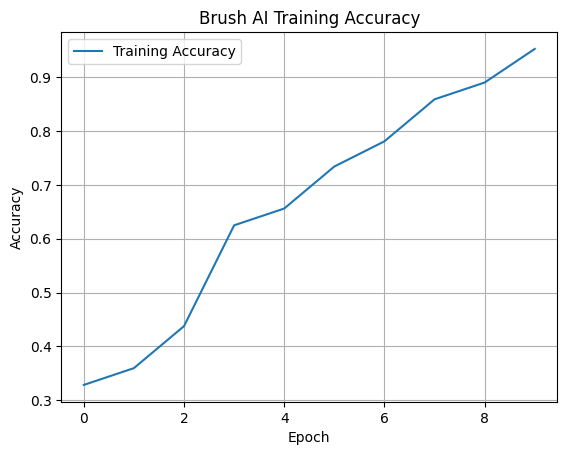

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Brush AI Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Predict and detect overlaps
img_path = "/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/heavy mesquite 2.JPG"
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0]
class_labels = {v: k for k, v in train_gen.class_indices.items()}
top = np.argsort(prediction)[::-1]

print(f"🧠 Predicted: {class_labels[top[0]]} (Confidence: {prediction[top[0]]:.2f})")

if len(top) > 1 and abs(prediction[top[0]] - prediction[top[1]]) < 0.15:
    print(f"🌀 Closest match: {class_labels[top[1]]} (Confidence: {prediction[top[1]]:.2f})")
    print("🔍 Visual overlap detected — possible look-alike")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
🧠 Predicted: Mesquite_Heavy (Confidence: 0.86)


In [17]:
# 📦 Batch prediction for folder of images
import csv

test_folder = '/content/drive/MyDrive/BrushAI_Master_Kit/test_batch'  # Update this folder as needed
output_csv = '/content/drive/MyDrive/BrushAI_Master_Kit/batch_predictions.csv'
class_labels = {v: k for k, v in train_gen.class_indices.items()}

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filename', 'prediction', 'confidence', 'lookalike', 'lookalike_confidence', 'notes'])

    for file in os.listdir(test_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(test_folder, file)
            try:
                img = load_img(path, target_size=(128, 128))
                img_array = img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = model.predict(img_array)[0]
                top = np.argsort(prediction)[::-1]
                top1 = class_labels[top[0]]
                conf1 = prediction[top[0]]
                lookalike = class_labels[top[1]] if len(top) > 1 else ''
                conf2 = prediction[top[1]] if len(top) > 1 else 0.0
                note = "Overlap" if abs(conf1 - conf2) < 0.15 else ""

                writer.writerow([file, top1, round(conf1, 2), lookalike, round(conf2, 2), note])
            except Exception as e:
                print(f'❌ Could not process {file}: {e}')

print(f'✅ Done. Predictions saved to: {output_csv}')

✅ Done. Predictions saved to: /content/drive/MyDrive/BrushAI_Master_Kit/batch_predictions.csv


In [18]:
import shutil

# Change this to wherever you want in your Drive
drive_output_path = "/content/drive/MyDrive/BrushAI_Master_Kit/BrushAI_Results"

# Create dir if it doesn't exist
os.makedirs(drive_output_path, exist_ok=True)

# Copy results
shutil.copy("/content/drive/MyDrive/BrushAI_Master_Kit/batch_predictions.csv", drive_output_path)
shutil.copytree("/content/drive/MyDrive/BrushAI_Master_Kit/prediction_previews", f"{drive_output_path}/prediction_previews", dirs_exist_ok=True)

print(f"✅ Results saved to: {drive_output_path}")


✅ Results saved to: /content/drive/MyDrive/BrushAI_Master_Kit/BrushAI_Results


In [19]:
import os, csv
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd

output_csv = "/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/fresh_frame_predictions.csv"
class_labels = {v: k for k, v in train_gen.class_indices.items()}

with open(output_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'prediction', 'confidence', 'lookalike', 'lookalike_confidence', 'notes'])

    for file in os.listdir('/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames'):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                path = os.path.join('/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames', file)
                img = load_img(path, target_size=(128, 128))
                img_array = img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = model.predict(img_array)[0]
                top = prediction.argsort()[::-1]
                top1, conf1 = class_labels[top[0]], prediction[top[0]]
                top2, conf2 = class_labels[top[1]], prediction[top[1]]
                note = "Overlap" if abs(conf1 - conf2) < 0.15 else ""

                writer.writerow([file, top1, round(conf1, 2), top2, round(conf2, 2), note])
            except Exception as e:
                print(f"❌ Error with {file}: {e}")

print("✅ Done. Predictions saved to fresh_frame_predictions.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
✅ Done. Predictions saved to fresh_frame_predictions.csv


In [20]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/fresh_frame_predictions.csv")


,filename,prediction,confidence,lookalike,lookalike_confidence,notes
0,DJI_0994.JPG,Cedar_Heavy,0.51,Huisache_Heavy,0.43,Overlap
1,DJI_0993.JPG,Mesquite_Heavy,0.46,Huisache_Heavy,0.45,Overlap
2,DJI_0995.JPG,Cedar_Heavy,0.66,Huisache_Heavy,0.28,NaN
3,DJI_0996.JPG,Cedar_Heavy,0.49,Huisache_Heavy,0.45,Overlap
4,DJI_0997.JPG,Huisache_Heavy,0.45,Cedar_Heavy,0.39,Overlap
5,DJI_0990.JPG,Mesquite_Heavy,0.86,Huisache_Heavy,0.08,NaN
6,DJI_0991.JPG,Mesquite_Heavy,0.60,Huisache_Heavy,0.23,NaN
7,DJI_0992.JPG,Mesquite_Heavy,0.76,Huisache_Heavy,0.17,NaN
8,heavy mesquite 4.JPG,Mesquite_Heavy,0.99,Huisache_Heavy,0.00,NaN
9,heavy mesquite 2.JPG,Mesquite_Heavy,0.86,Unknown,0.12,NaN


In [21]:
# 🖼️ Visual Comparison Report for Fresh Frames
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd
import os

csv_path = "/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/fresh_frame_predictions.csv"
image_dir = "/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames"
pdf_output_path = "/content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/BrushAI_Visual_Report.pdf"

df = pd.read_csv(csv_path)

with PdfPages(pdf_output_path) as pdf:
    for row in df.itertuples():
        file_path = os.path.join(image_dir, row.filename)
        try:
            img = Image.open(file_path).convert('RGB').resize((256, 256))
            draw = ImageDraw.Draw(img)
            label = f"{row.prediction} ({row.confidence:.2f})"
            if row.notes == "Overlap":
                label += f" | Lookalike: {row.lookalike} ({row.lookalike_confidence:.2f})"
            draw.rectangle([0, 220, 256, 256], fill=(0, 0, 0))
            draw.text((10, 230), label, fill='white')

            fig, ax = plt.subplots(figsize=(3, 3))
            ax.imshow(img)
            ax.set_title(row.filename)
            ax.axis('off')
            pdf.savefig(fig)
            plt.close(fig)
        except Exception as e:
            print(f"❌ Could not open {row.filename}: {e}")

print(f"✅ Visual report saved to: {pdf_output_path}")


✅ Visual report saved to: /content/drive/MyDrive/BrushAI_Master_Kit/fresh_test_frames/fresh_frame_predictions/BrushAI_Visual_Report.pdf


In [22]:
model.save('/content/drive/MyDrive/BrushAI/BrushAI_MASTER_Training_Notebook.h5')


In [24]:
my_model.keras('/content/drive/MyDrive/BrushAI/BrushAI_MASTER_Training_Notebook.h5')


NameError: name 'my_model' is not defined